# Fiscal Years in Focus: How Apple's Business Metrics Align with Its Carbon Footprint

In [1]:
# imports

import pandas as pd
pd.set_option('display.max_rows', None)

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Wedge

import seaborn as sns

import dash
from dash.dependencies import Input, Output
import plotly.graph_objects as go
#from jupyter_dash import JupyterDash
from dash import Dash, dcc, html, Input, Output

from sklearn.linear_model import LinearRegression

In [2]:
carbon_footprint = 'apple_emissions/carbon_footprint_by_product.csv'
greenhouse_gas = 'apple_emissions/greenhouse_gas_emissions.csv'
normalizing_factors = 'apple_emissions/normalizing_factors.csv'

In [3]:
footprint_df = pd.read_csv(carbon_footprint)
greenhouse_gas_df = pd.read_csv(greenhouse_gas)
normalizing_df = pd.read_csv(normalizing_factors)

In [4]:
normalizing_df.head()

Fiscal Year  Revenue  Market Capitalization  Employees
0         2022   394328                   2490     164000
1         2021   365817                   2450     154000
2         2020   274515                   1720     147000
3         2019   260174                   1090     137000
4         2018   265595                    830     132000

In [5]:
greenhouse_gas_df.head()

Fiscal Year             Category             Type                   Scope  \
0         2022  Corporate emissions  Gross emissions                 Scope 1   
1         2022  Corporate emissions  Gross emissions                 Scope 1   
2         2022  Corporate emissions  Gross emissions                 Scope 1   
3         2022  Corporate emissions  Gross emissions  Scope 2 (market-based)   
4         2022  Corporate emissions  Gross emissions  Scope 2 (market-based)   

                                 Description  Emissions  
0               Natural gas, diesel, propane    39700.0  
1                             Fleet vehicles    12600.0  
2  Other (R&D processes & refrigerant leaks)     2900.0  
3                                Electricity        0.0  
4                Steam, heating, and cooling     3000.0

In [6]:
footprint_df.head()

Release Year    Product  Baseline Storage  Carbon Footprint
0          2023  iPhone 15               128                56
1          2022  iPhone 14               128                61
2          2021  iPhone 13               128                64
3          2020  iPhone 12                64                70
4          2019  iPhone 11                64                72

In [7]:
normalizing_df

Fiscal Year  Revenue  Market Capitalization  Employees
0         2022   394328                   2490     164000
1         2021   365817                   2450     154000
2         2020   274515                   1720     147000
3         2019   260174                   1090     137000
4         2018   265595                    830     132000
5         2017   229234                    740     123000
6         2016   215639                    600     116000
7         2015   233715                    580     110000

## Introduction
### Apple's Journey: Business Growth Meets Environmental Responsibility

As one of the world's leading tech giants, Apple's business metrics are a testament to its continued growth and adaptability. But beyond the numbers lies a compelling narrative about commitment — a commitment to reducing its carbon footprint and promoting sustainable practices. In this presentation, we'll journey through fiscal years 2015 to 2022, shedding light on how Apple's key business indicators have evolved in parallel with its environmental ambitions.

### Normalizing Factors is missing 2023 data.  
For the visualization I would like to create, Normalizing Factors is missing 2023 data and an extra 2017 row.  What I want to do is make a simple line chart using Norm Factors and footprint 

Forecasting the 2023 data using linear regression and duplicating the row for 2017 should do the trick.  There are other ways to forecast data

#### TSD, Smoothing, ARIMA, Prophet, SMA, Interpolation...
Linear regression is the simplest since there is not that much data.  It would be fun to see how accurate each one is compared to real data

MacroTrends states that Apples Market Revenue has fallen to $383.933B a 0.93% decline  https://www.macrotrends.net/stocks/charts/AAPL/apple/revenue#:~:text=Apple%20revenue%20for%20the%20quarter,a%207.79%25%20increase%20from%202021.

Earthweb states apple has close to 200,000 employees world wide  https://earthweb.com/apple-employees/

In [8]:
def forecasting_for_2023(df, column_name):
    #reshaping the data
    X = df['Fiscal Year'].values.reshape(-1,1)
    y = df[column_name].values
    
    #linear regression model
    model = LinearRegression()
    
    #training
    model.fit(X,y)
    
    #prediction(s) for 2023
    prediction = model.predict(np.array([[2023]]))
    
    return prediction[0]
# Predictions for 2023
revenue_2023 = forecasting_for_2023(normalizing_df, 'Revenue')
market_cap_2023 = forecasting_for_2023(normalizing_df, 'Market Capitalization')
employees_2023 = forecasting_for_2023(normalizing_df, 'Employees')

print("Predicted Revenue for 2023:", int(revenue_2023))
print("Predicted Market Capitalization for 2023:", int(market_cap_2023))
print("Predicted Employees for 2023:", int(employees_2023))

predicted_data = {
    'Fiscal Year':2023,
    'Revenue': int(revenue_2023),
    'Employees': int(employees_2023),
    'Market Capitalization': int(market_cap_2023)
}

norm_df_copy = normalizing_df
##Append is depricated please use concat
# norm_df_copy = norm_df_copy.append(predicted_data,ignore_index=True)

df_2023 = pd.DataFrame([predicted_data])
norm_df_copy = pd.concat([norm_df_copy, df_2023],ignore_index=True)

## Duplicating row for 2017 data
i = 5

norm_final_df = pd.concat([norm_df_copy, norm_df_copy.iloc[[i]]], ignore_index=True)

norm_final_df = norm_final_df.sort_values(by='Fiscal Year',ascending=False)

norm_final_df

Predicted Revenue for 2023: 387320
Predicted Market Capitalization for 2023: 2695
Predicted Employees for 2023: 169928


Fiscal Year  Revenue  Market Capitalization  Employees
8         2023   387320                   2695     169928
0         2022   394328                   2490     164000
1         2021   365817                   2450     154000
2         2020   274515                   1720     147000
3         2019   260174                   1090     137000
4         2018   265595                    830     132000
5         2017   229234                    740     123000
9         2017   229234                    740     123000
6         2016   215639                    600     116000
7         2015   233715                    580     110000

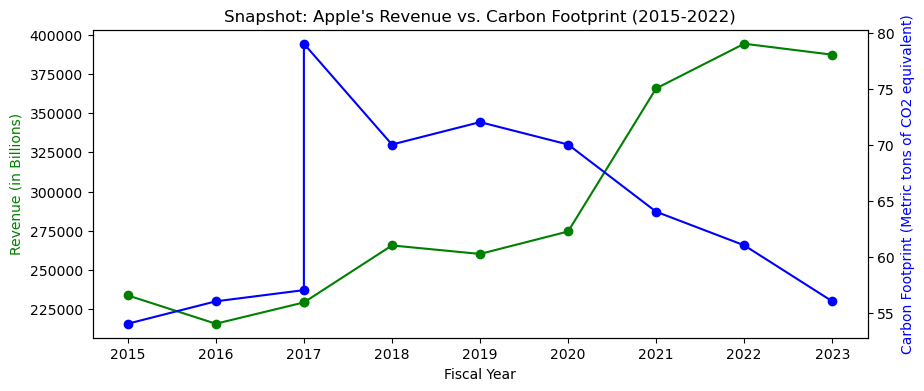

In [9]:
years = norm_final_df['Fiscal Year']
revenue = norm_final_df['Revenue']
carbon_footprint = footprint_df['Carbon Footprint']
carbon_years = footprint_df['Release Year']

fix, ax1 = plt.subplots(figsize=(10,4))

ax2 = ax1.twinx()

ax1.plot(years,revenue, 'g-')
ax2.plot(carbon_years, carbon_footprint, 'b-')

ax1.scatter(years, revenue, color='g')
ax2.scatter(carbon_years, carbon_footprint, color='b')

ax1.set_xlabel('Fiscal Year')
ax1.set_ylabel('Revenue (in Billions)',color='g')
ax2.set_ylabel('Carbon Footprint (Metric tons of CO2 equivalent)', color='b')

plt.title("Snapshot: Apple's Revenue vs. Carbon Footprint (2015-2022)")
plt.show()

## Apple's Revenue Growth
### Apple's Soaring Revenues: 2015-2022

As Apple's market value has surged over the years, its global influence has concurrently expanded. With this growing stature comes an amplified spotlight on the company's environmental commitments. Market capitalization isn't just a reflection of financial success; it's also an indirect measure of investor trust in the company's long-term vision, which includes sustainability.

This graph paints a dual tale of Apple's financial prowess.  On one hand, the ever-climbing revenue graph speaks to Apple's innovative products and services that continue to find resonance with global consumers. Parallelly, market capitalization, a key indicator of investor trust and perceived value, mirrors this sentiment. Peaks in the market capitalization plot hint at moments when investor confidence surged, oftentimes in tandem with revenue highs.

This correlation is logical: a larger market presence means greater resource consumption, larger supply chains, and a more profound impact on the environment. Thus, companies with substantial market caps, like Apple, are often expected to pioneer sustainable practices and reduce their carbon footprint.

To maintain investor trust and live up to its reputation, Apple needs to ensure that its growing market capitalization is paralleled by increased efforts towards environmental responsibility. Leveraging its influence, Apple has the opportunity not only to minimize its environmental impact but also to set industry standards and inspire other corporations to follow suit.

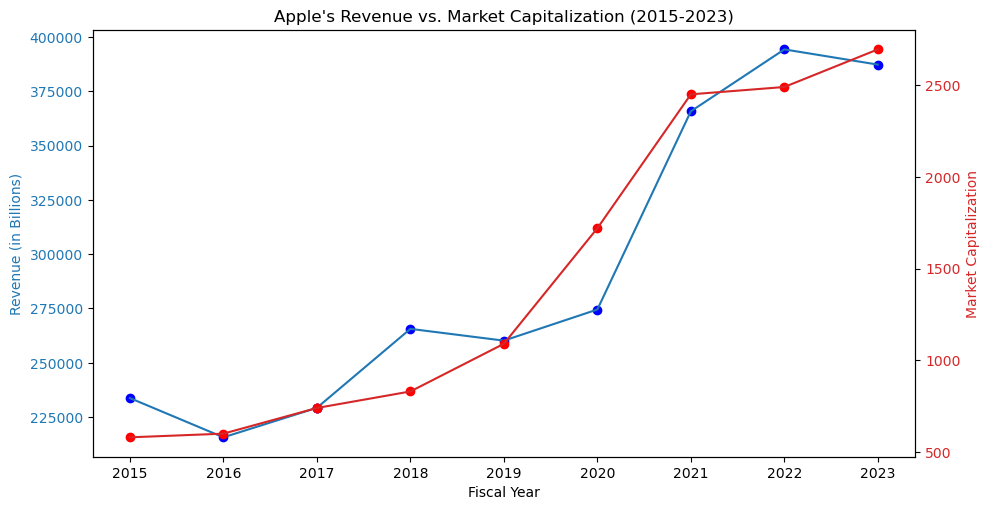

In [10]:
{
    "tags": [
        "hide-input",
    ]
}

market_cap = norm_final_df['Market Capitalization']
years = norm_final_df['Fiscal Year']
revenue = norm_final_df['Revenue']

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel('Fiscal Year')
ax1.set_ylabel('Revenue (in Billions)', color=color)
ax1.plot(years, revenue, color=color, label='Revenue')
ax1.tick_params(axis='y', labelcolor=color)
ax1.scatter(years, revenue, color='b')


ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Market Capitalization', color=color)
ax2.plot(years, market_cap, color=color, label='Market Capitalization')
ax2.scatter(years, market_cap, color='r')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Apple's Revenue vs. Market Capitalization (2015-2023)")
plt.show()

## Employee Growth & Carbon Impact

### Apple's Expanding Team & Carbon Considerations

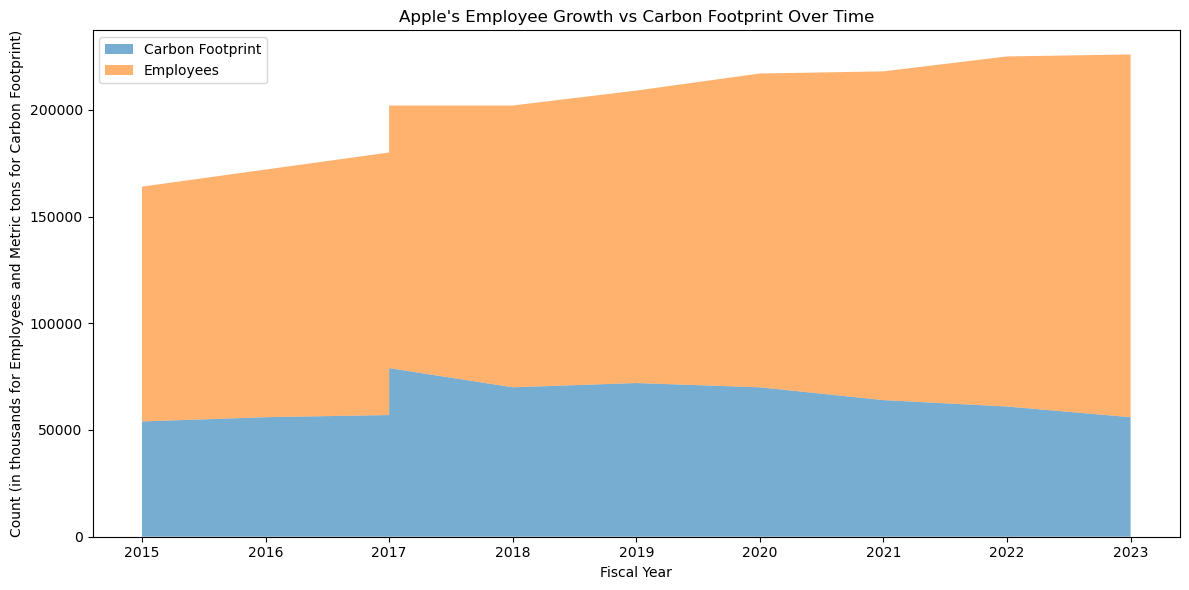

In [11]:
fiscal_years = footprint_df['Release Year'].to_numpy()
employees = norm_final_df['Employees'].to_numpy()
carbon_footprint = footprint_df['Carbon Footprint'].to_numpy() *1000

fig, ax = plt.subplots(figsize=(12, 6))
ax.stackplot(fiscal_years, carbon_footprint, employees, labels=['Carbon Footprint','Employees'], alpha=0.6)
ax.set_title('Apple\'s Employee Growth vs Carbon Footprint Over Time')
ax.set_xlabel('Fiscal Year')
ax.set_ylabel('Count (in thousands for Employees and Metric tons for Carbon Footprint)')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [12]:
greenhouse_gas_df.dtypes

Fiscal Year      int64
Category        object
Type            object
Scope           object
Description     object
Emissions      float64
dtype: object

In [13]:
table = pd.DataFrame({"Feature":[], "Missing":[], "Unique":[]})

for column in greenhouse_gas_df.columns:
    table.loc[len(table.index)] = [column, sum(pd.isnull(x) for x in greenhouse_gas_df[column]),
                                                           len(set(x for x in greenhouse_gas_df[column]))]

display(table)

Feature  Missing  Unique
0  Fiscal Year        0       8
1     Category        0       2
2         Type        0       2
3        Scope       16       4
4  Description        0      17
5    Emissions       27     104

In [14]:
#how many nans in scope related to carbon removals -16
#there are 16 nans per the table dataframe
greenhouse_gas_df[pd.isna(greenhouse_gas_df['Scope'])]

Fiscal Year                      Category             Type Scope  \
11          2022           Corporate emissions  Carbon removals   NaN   
16          2022  Product life cycle emissions  Carbon removals   NaN   
28          2021           Corporate emissions  Carbon removals   NaN   
33          2021  Product life cycle emissions  Carbon removals   NaN   
45          2020           Corporate emissions  Carbon removals   NaN   
50          2020  Product life cycle emissions  Carbon removals   NaN   
62          2019           Corporate emissions  Carbon removals   NaN   
67          2019  Product life cycle emissions  Carbon removals   NaN   
79          2018           Corporate emissions  Carbon removals   NaN   
84          2018  Product life cycle emissions  Carbon removals   NaN   
96          2017           Corporate emissions  Carbon removals   NaN   
101         2017  Product life cycle emissions  Carbon removals   NaN   
113         2016           Corporate emissions  Carbon removals   NaN   
118         2016  Product life cycle emissions  Carbon removals   NaN   
130         2015           Corporate emissions  Carbon removals   NaN   
135         2015  Product life cycle emissions  Carbon removals   NaN   

                  Description  Emissions  
11   Corporate carbon offsets  -324100.0  
16     Product carbon offsets        0.0  
28   Corporate carbon offsets  -167000.0  
33     Product carbon offsets  -500000.0  
45   Corporate carbon offsets   -70000.0  
50     Product carbon offsets        0.0  
62   Corporate carbon offsets        0.0  
67     Product carbon offsets        0.0  
79   Corporate carbon offsets        0.0  
84     Product carbon offsets        0.0  
96   Corporate carbon offsets        NaN  
101    Product carbon offsets        NaN  
113  Corporate carbon offsets        NaN  
118    Product carbon offsets        NaN  
130  Corporate carbon offsets        NaN  
135    Product carbon offsets        NaN

In [15]:
#how many carbon removals are there
greenhouse_gas_df[greenhouse_gas_df['Type'] == 'Carbon removals'].shape[0]

16

In [16]:
## imputed all carbon removals with nan scopes to scope 4
## imputed all carbon removals with nan emissions to 0 
greenhouse_gas_df.loc[greenhouse_gas_df['Type'] == 'Carbon removals', 'Scope'] = 'Scope 4 (Carbon removals)'
greenhouse_gas_df['Emissions'] = greenhouse_gas_df['Emissions'].fillna(0)

In [17]:
table = pd.DataFrame({"Feature":[], "Missing":[], "Unique":[]})

for column in greenhouse_gas_df.columns:
    table.loc[len(table.index)] = [column, sum(pd.isnull(x) for x in greenhouse_gas_df[column]),
                                                           len(set(x for x in greenhouse_gas_df[column]))]

display(table)

Feature  Missing  Unique
0  Fiscal Year        0       8
1     Category        0       2
2         Type        0       2
3        Scope        0       4
4  Description        0      17
5    Emissions        0      77

In [33]:
greenhouse_gas_df.head()

Fiscal Year             Category             Type                   Scope  \
0         2022  Corporate emissions  Gross emissions                 Scope 1   
1         2022  Corporate emissions  Gross emissions                 Scope 1   
2         2022  Corporate emissions  Gross emissions                 Scope 1   
3         2022  Corporate emissions  Gross emissions  Scope 2 (market-based)   
4         2022  Corporate emissions  Gross emissions  Scope 2 (market-based)   

                                 Description  Emissions  
0               Natural gas, diesel, propane    39700.0  
1                             Fleet vehicles    12600.0  
2  Other (R&D processes & refrigerant leaks)     2900.0  
3                                Electricity        0.0  
4                Steam, heating, and cooling     3000.0

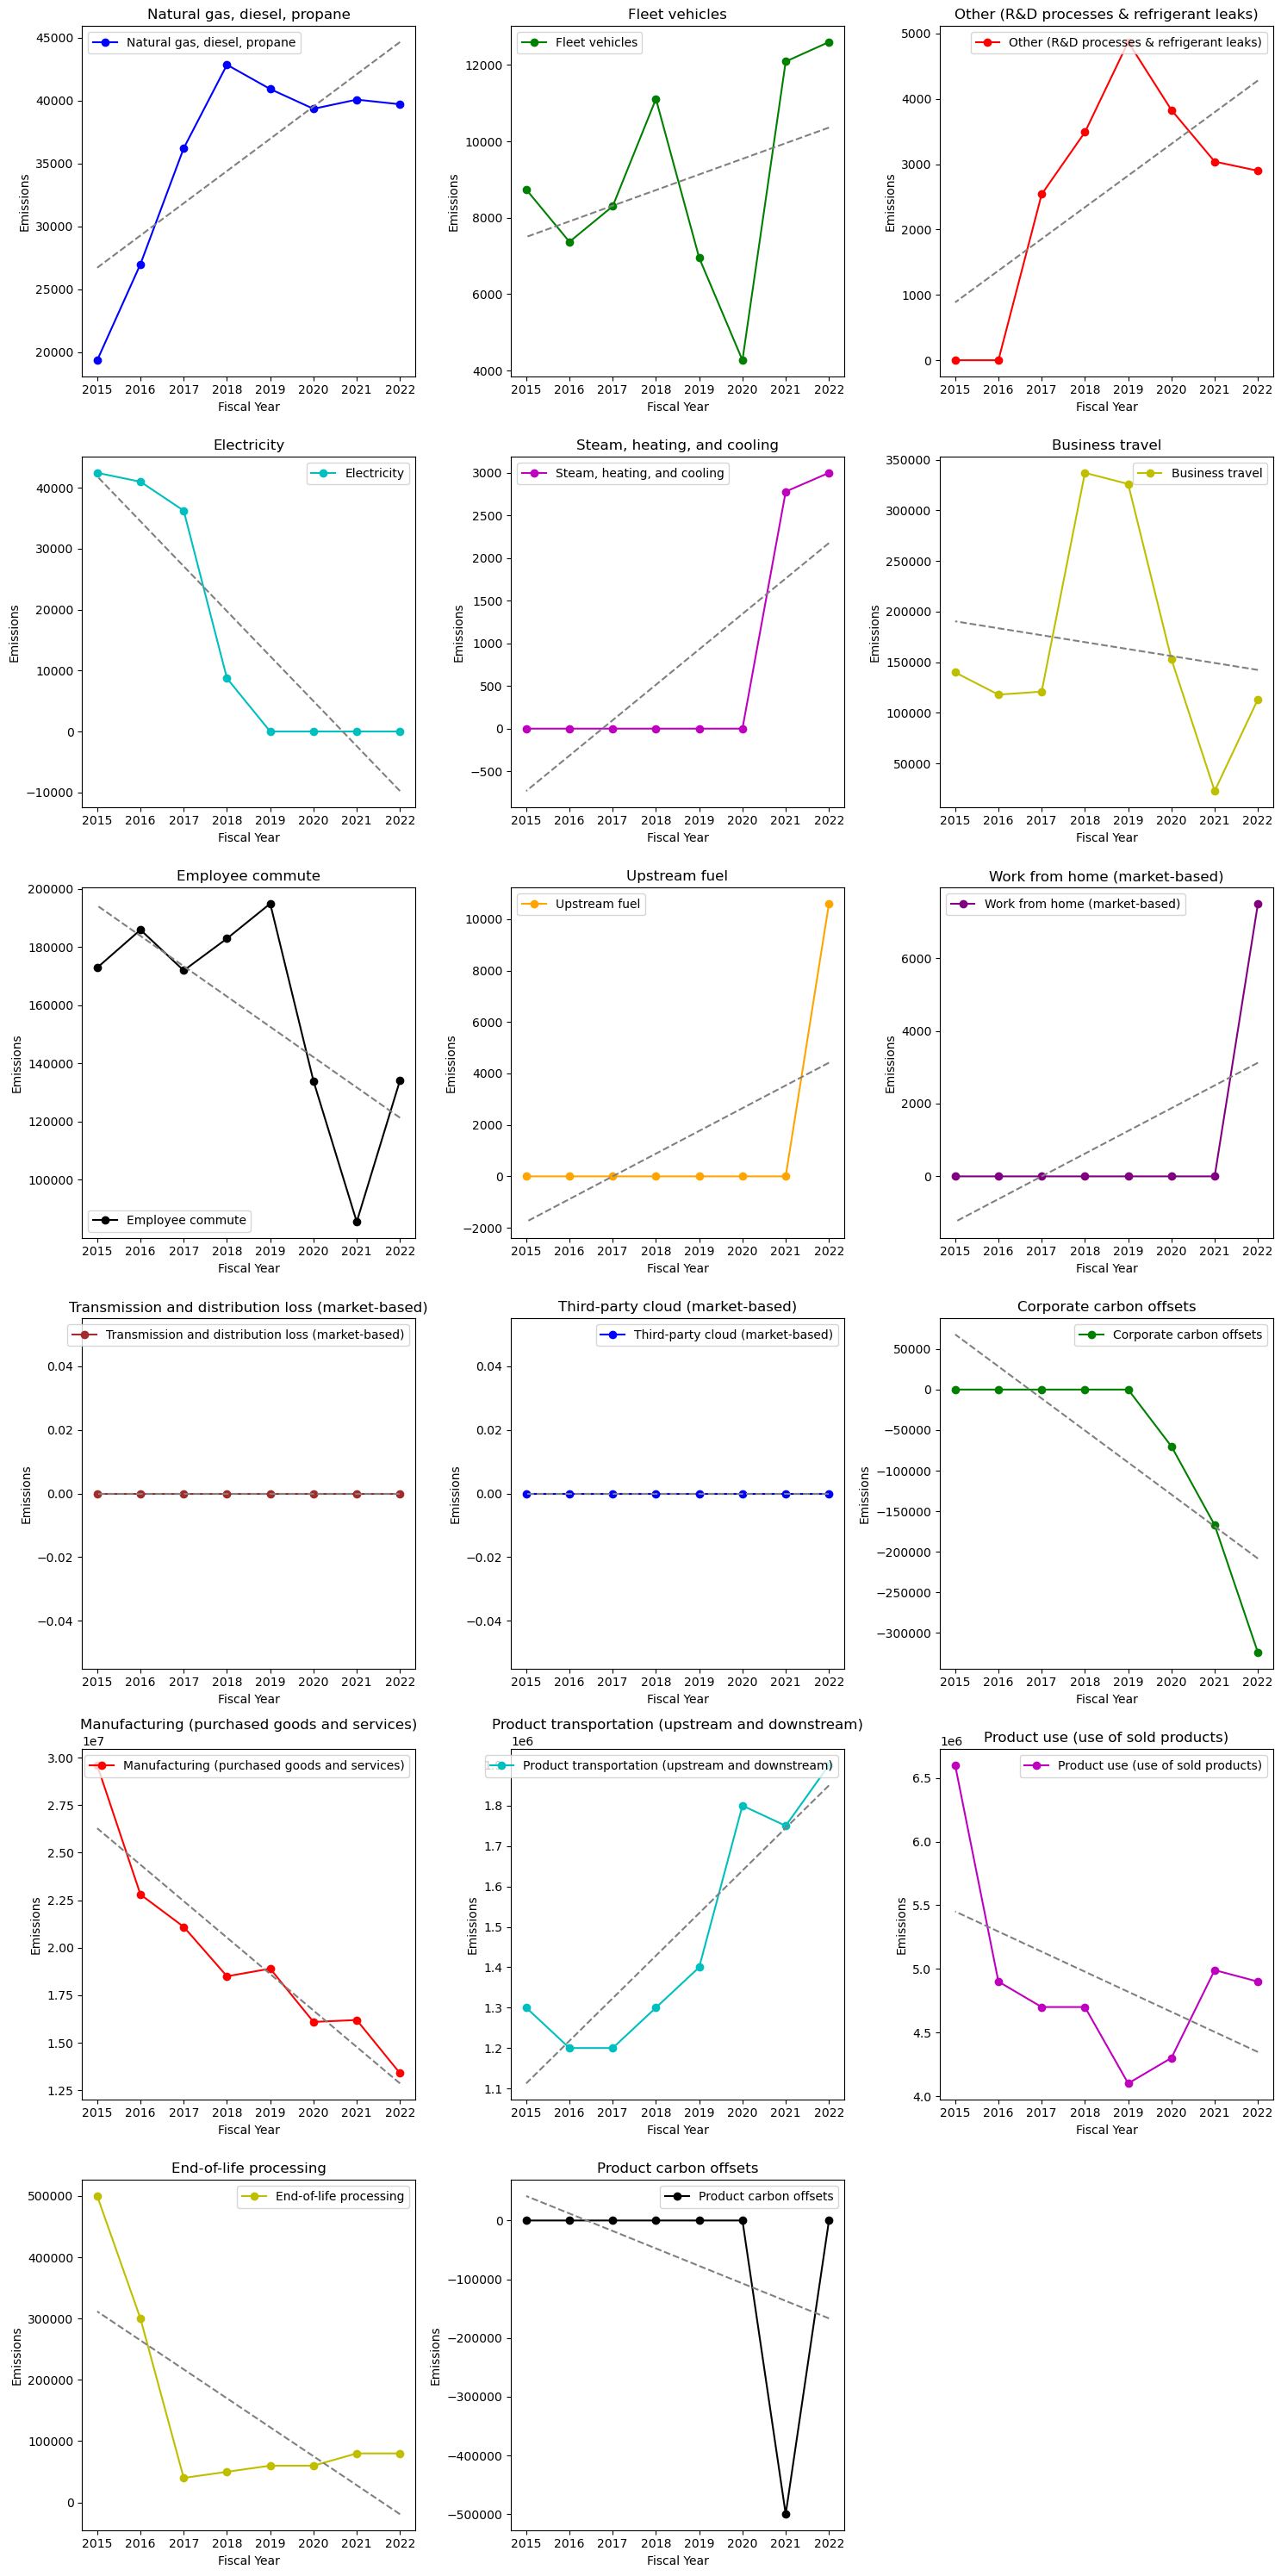

In [19]:
unique_desciptions = greenhouse_gas_df['Description'].unique()

n_descriptions = len(unique_desciptions)
cols = 3  # Number of columns
rows = n_descriptions // cols + (n_descriptions % cols > 0)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = np.array(axes)  

for i, description in enumerate(unique_desciptions):
    row, col = divmod(i, cols)
    ax = axes[row, col]
    
    subset = greenhouse_gas_df[greenhouse_gas_df['Description'] == description]
    ax.plot(subset['Fiscal Year'], subset['Emissions'], color=colors[i % len(colors)], marker='o', label=description)
    m, b = np.polyfit(subset['Fiscal Year'], subset['Emissions'], 1)
    ax.plot(subset['Fiscal Year'], m * subset['Fiscal Year'] + b, color='gray', linestyle='--')
    ax.set_title(description)
    ax.set_xlabel("Fiscal Year")
    ax.set_ylabel("Emissions")
    ax.grid(False)
    ax.legend()


for j in range(i+1, rows*cols):
    row, col = divmod(j, cols)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [28]:
scope3_rows = greenhouse_gas_df[greenhouse_gas_df['Scope'] == 'Scope 3']
#scope_map = greenhouse_gas_df[['Fiscal Year', 'Scope', 'Emissions']]

In [29]:
agg_df = scope3_rows.groupby(['Scope','Fiscal Year']).agg({'Emissions':'sum'}).reset_index()

In [30]:
heat_map = agg_df.pivot('Scope','Fiscal Year', 'Emissions')

C:\Users\awnet\AppData\Local\Temp\ipykernel_4256\4069874014.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heat_map = agg_df.pivot('Scope','Fiscal Year', 'Emissions')


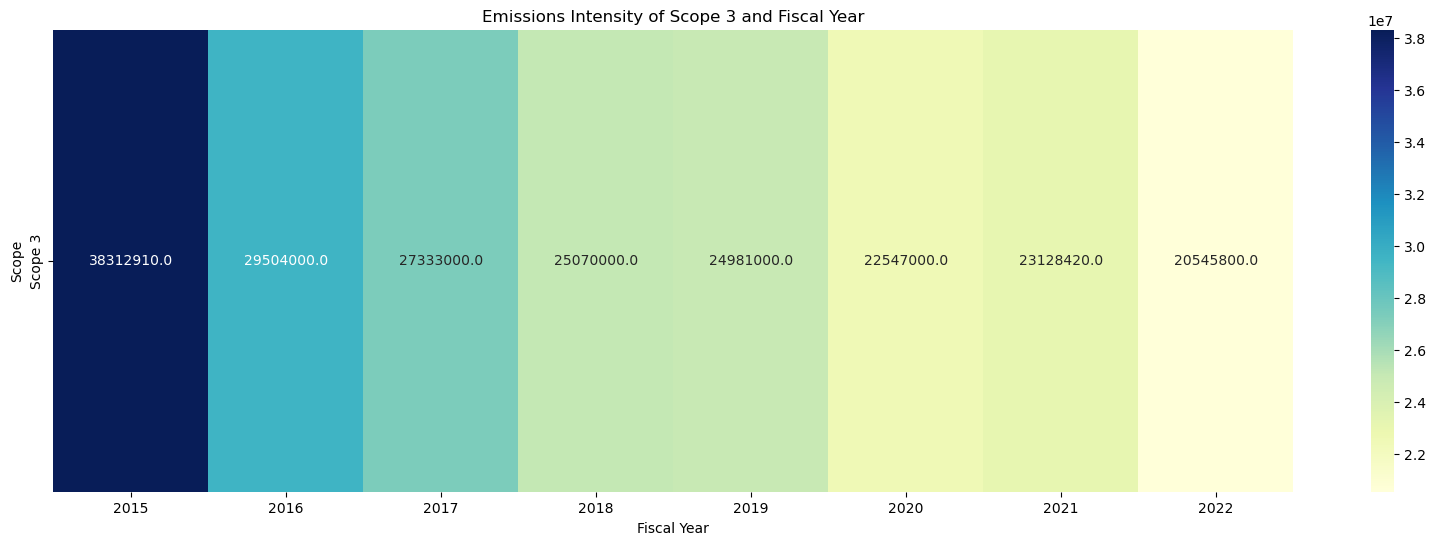

In [32]:
plt.figure(figsize=(20,6))
sns.heatmap(heat_map, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Emissions Intensity of Scope 3 and Fiscal Year")
plt.show()

In [24]:
years = norm_final_df['Fiscal Year']
revenue = norm_final_df['Revenue']
carbon_footprint = footprint_df['Carbon Footprint']
carbon_years = footprint_df['Release Year']

In [ ]:
##Move Dash to VSCode